In [1]:
# import libraries
import numpy as np
from scipy.spatial.distance import cdist
from sklearn import cross_validation
from matplotlib import pyplot as plt
from matplotlib.pyplot import matshow
from sklearn.metrics import roc_curve, auc
import csv

C:\Users\AngZhou\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## 1. Digit Recognizer

# (a) Loading DataSet and Labels

print "Loading dataset..."
X_train=[]
Y_train=[]
with open('C:/Users/AngZhou/Desktop/Cornell_Course/AML/HW/HW1/All_data_set_MNIST/train.csv', 'rb') as f:
    next(f,None)
    for row in csv.reader(f):
        if row != []:
            X_train.append(row[1:])
            Y_train.append(row[0])
X_train=np.array(X_train,dtype=int)
Y_train=np.array(Y_train,dtype=int)
print X_train.shape
print Y_train.shape

X_test=[]
with open('C:/Users/AngZhou/Desktop/Cornell_Course/AML/HW/HW1/All_data_set_MNIST/test.csv', 'rb') as f:
    next(f,None)
    for row in csv.reader(f):
        if row != []:
            X_test.append(row[0:])
            # Y_test.append(row[0])
X_test=np.array(X_test,dtype=int)
print X_test.shape
print "done"

Loading dataset...
(42000L, 784L)
(42000L,)
(28000L, 784L)
done


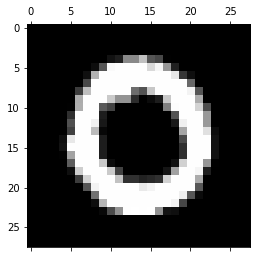

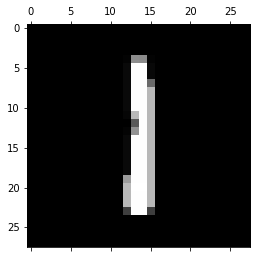

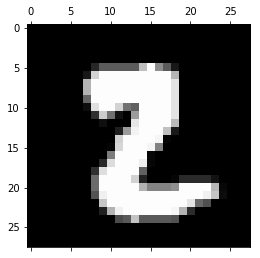

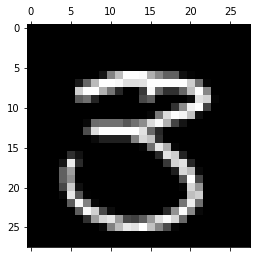

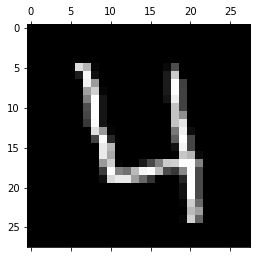

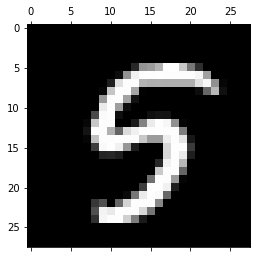

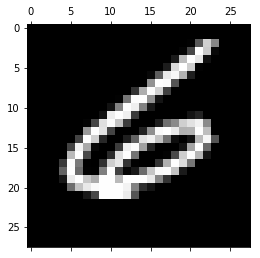

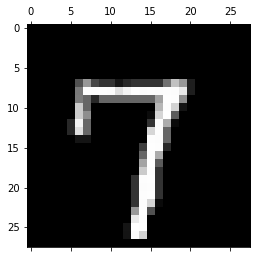

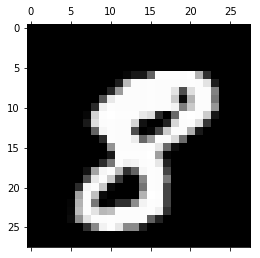

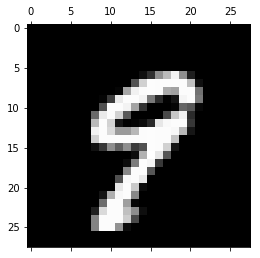

In [3]:
# (b) Write a function to display an MNIST digit. Display one of each digit.

def digit_print_by_index(index):
    matshow(X_train[index].reshape(28,28), cmap='gray')

digits_example_index=[1,2,16,7,3,8,21,6,10,11]
for index in digits_example_index:
    digit_print_by_index(index)

[4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]
[0.09838095 0.11152381 0.09945238 0.10359524 0.09695238 0.09035714
 0.0985     0.10478571 0.0967381  0.09971429]


(array([0.09838095, 0.11152381, 0.09945238, 0.10359524, 0.09695238,
        0.09035714, 0.0985    , 0.10478571, 0.0967381 , 0.09971429]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

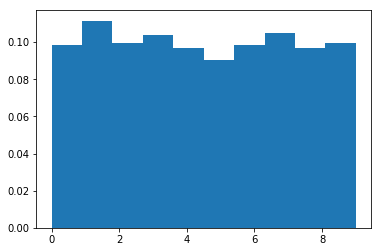

In [4]:
# (c) Examine the prior probability of the classes in the training data. Is it uniform across the digits?
#     Display a normalized histogram of digit counts. Is it even?
num_of_train = Y_train.shape[0]
digits_count=np.zeros(10, int)
digits_prior_prob=np.zeros(10)

for y in Y_train:
    digits_count[y]=digits_count[y]+1


for index in range(10):
    digits_prior_prob[index] = digits_count[index]/float(num_of_train)
print digits_count
print digits_prior_prob

plt.hist(range(10), weights=digits_prior_prob)

# It is nearly uniform across thedigits

digit:  0 ; index:  1
digit:  0 ; index:  12950
distance:  [[1046.59543282]]

digit:  1 ; index:  2
digit:  1 ; index:  37217
distance:  [[441.01133772]]

digit:  2 ; index:  16
digit:  2 ; index:  9536
distance:  [[1380.8772574]]

*************************
digit:  3 ; index:  7
digit:  5 ; index:  8981
distance:  [[1832.66499939]]
*************************

digit:  4 ; index:  3
digit:  4 ; index:  14787
distance:  [[1356.88098225]]

digit:  5 ; index:  8
digit:  5 ; index:  30073
distance:  [[1066.36766643]]

digit:  6 ; index:  21
digit:  6 ; index:  16240
distance:  [[1446.51132038]]

digit:  7 ; index:  6
digit:  7 ; index:  15275
distance:  [[863.50101332]]

digit:  8 ; index:  10
digit:  8 ; index:  32586
distance:  [[1593.777588]]

digit:  9 ; index:  11
digit:  9 ; index:  35742
distance:  [[910.57674031]]



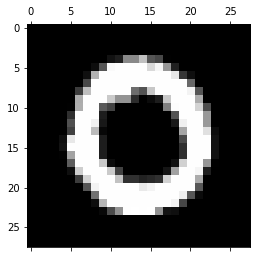

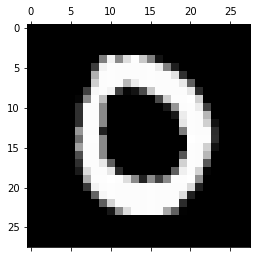

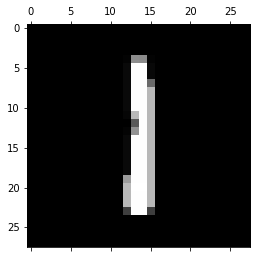

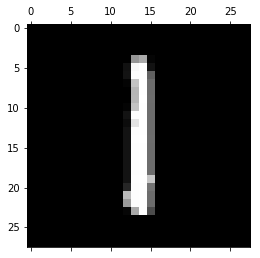

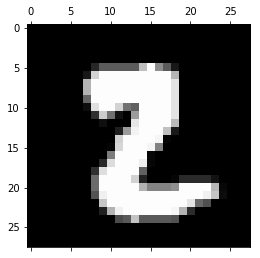

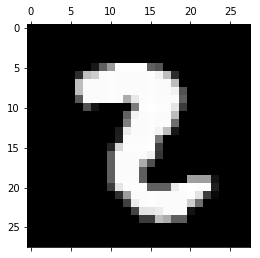

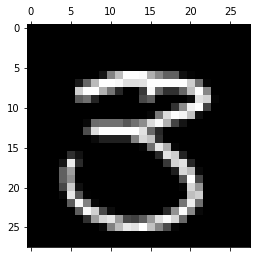

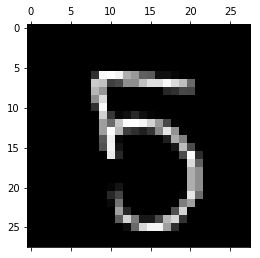

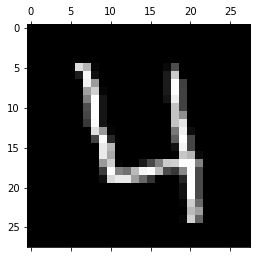

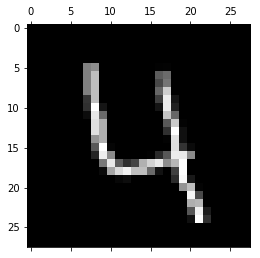

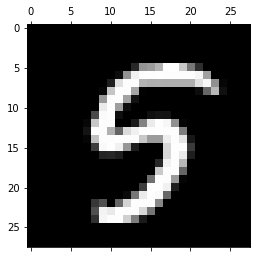

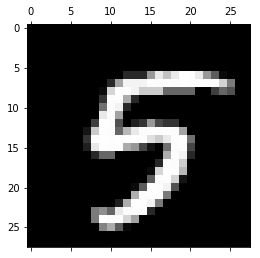

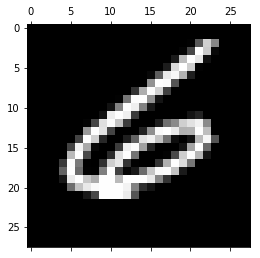

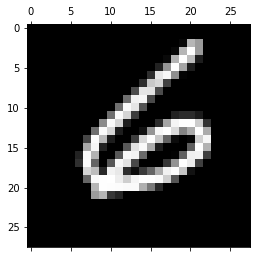

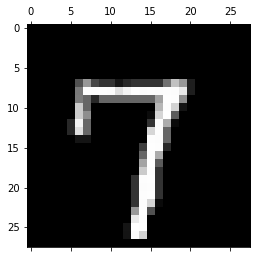

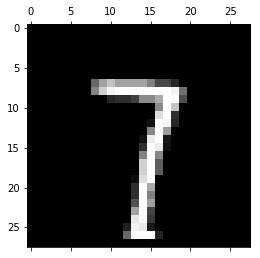

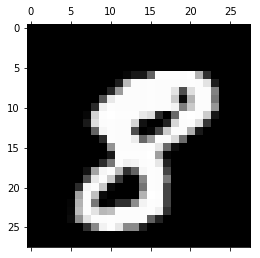

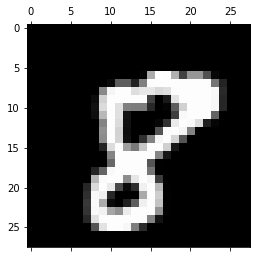

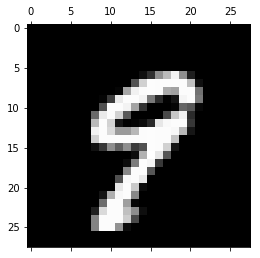

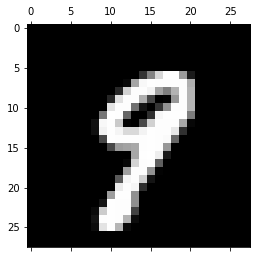

In [5]:
# (d) Pick one example of each digit from your training data. 
#     Then, for each sample digit, compute and show the best match (nearest neighbor) between 
#     your chosen sample and the rest of the training data. Use L2 distance between the two images’ 
#     pixel values as the metric. This probably won’t be perfect, so add an asterisk next 
#     to the erroneous examples(if any).

digits_example_index=[1,2,16,7,3,8,21,6,10,11]

# method 1)
from scipy.spatial import distance_matrix
nearest_imgs=[]
for current_digit,example_index in enumerate(digits_example_index):
    nearest_img=(None, float('inf'),-1)
    for index,img in enumerate(X_train):
        if index!=example_index:
            dist=distance_matrix([img],[X_train[example_index]])
            if dist<nearest_img[1]:
                nearest_img=(img,dist,index)
                
    if(current_digit!=Y_train[nearest_img[2]]):
        print "*************************"
    print "digit: ",current_digit,"; index: ",example_index
    print "digit: ",Y_train[nearest_img[2]],"; index: ",nearest_img[2]
    print "distance: ",nearest_img[1]
    if(current_digit!=Y_train[nearest_img[2]]):
        print "*************************"
    print ""
    
    matshow(X_train[example_index].reshape(28,28), cmap='gray')
    matshow(nearest_img[0].reshape(28,28), cmap='gray')
    
# method 2)
# from scipy.spatial.distance import cdist
# def closest_node(node, index, nodes):
#     tempSet=np.delete(nodes,index,axis=0)
#     return tempSet[cdist([node],tempSet).argmin()]
# for example_index in digits_example_index:
#     matshow(X_train[example_index].reshape(28,28), cmap='gray')
#     matshow(closest_node(X_train[example_index],example_index,X_train).reshape(28,28), cmap='gray')


# Conlucsion:
# The digit "three" doesn't have a correct similar img that have the same digit.
# The most similar img to this digit "three", according to this algorithm, is a digit "five". 



In [6]:
# (e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other digits, compute 
# the pairwise distances for all genuine matches and all impostor matches, again using the L2 norm. 
# Plot histograms of the genuine and impostor distances on the same set of axes.

print "start"
zero_imgs=[]
one_imgs=[]
for index,digit in enumerate(Y_train):
    if digit==0:
        zero_imgs.append(X_train[index])
    if digit==1:
        one_imgs.append(X_train[index])
print "finished"

print "start"
dist_matrix1=cdist(zero_imgs,zero_imgs)
dist_matrix2=cdist(one_imgs,one_imgs)
dist_matrix3=cdist(zero_imgs,one_imgs)
print "finished"

genuine_match_dists=[]
imposter_match_dists=[]

zero_pair_size=dist_matrix1.shape[0]
one_pair_size=dist_matrix2.shape[0]


for i in range(zero_pair_size):
    for j in range(i+1,zero_pair_size):
        genuine_match_dists.append(dist_matrix1[i,j])
        
for i in range(one_pair_size):
    for j in range(i+1,one_pair_size):
        genuine_match_dists.append(dist_matrix2[i,j])
        
for i in range(zero_pair_size):
    for j in range(one_pair_size):
        imposter_match_dists.append(dist_matrix3[i,j])
        
print len(genuine_match_dists)
print len(imposter_match_dists)

start
finished
start
finished
19502232
19354288


(array([2.00000e+00, 0.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00,
        5.00000e+00, 1.10000e+01, 1.40000e+01, 2.20000e+01, 4.40000e+01,
        4.50000e+01, 1.14000e+02, 1.45000e+02, 2.32000e+02, 3.83000e+02,
        5.12000e+02, 6.90000e+02, 8.53000e+02, 1.18700e+03, 1.64100e+03,
        2.08400e+03, 3.08000e+03, 4.39000e+03, 6.07300e+03, 8.79600e+03,
        1.19170e+04, 1.58720e+04, 2.07050e+04, 2.64340e+04, 3.33110e+04,
        4.25390e+04, 5.33440e+04, 6.64020e+04, 8.07790e+04, 9.85650e+04,
        1.18327e+05, 1.40487e+05, 1.67250e+05, 1.97172e+05, 2.29707e+05,
        2.64974e+05, 3.02168e+05, 3.42548e+05, 3.87105e+05, 4.34994e+05,
        4.82664e+05, 5.28236e+05, 5.73267e+05, 6.19477e+05, 6.69085e+05,
        7.12634e+05, 7.43937e+05, 7.65916e+05, 7.69024e+05, 7.65201e+05,
        7.58285e+05, 7.49962e+05, 7.36365e+05, 7.18709e+05, 6.96690e+05,
        6.67453e+05, 6.30853e+05, 5.90159e+05, 5.52963e+05, 5.00858e+05,
        4.50857e+05, 4.06908e+05, 3.60547e+05, 3.12

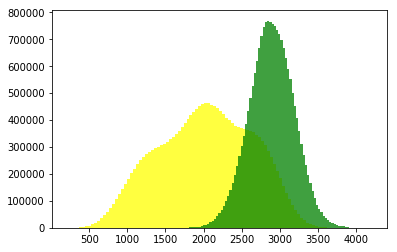

In [7]:
# Plot histograms of the genuine and impostor distances on the same set of axes.
plt.hist(genuine_match_dists,bins=100,facecolor='yellow',alpha=0.75)
plt.hist(imposter_match_dists,bins=100,facecolor='green',alpha=0.75)

In [8]:
# (f) Generate an ROC curve from the above sets of distances. What is the equal error rate? 
# What is the error rate of a classiﬁer that simply guesses randomly?

A=np.zeros(len(imposter_match_dists),int)
B=np.ones(len(genuine_match_dists),int)
Y_dists_classifier=np.concatenate([A,B])
X_dists_classifier=np.concatenate([imposter_match_dists,genuine_match_dists])
print Y_dists_classifier
print X_dists_classifier

[0 0 0 ... 1 1 1]
[3307.63873481 3224.55206191 3274.39337893 ... 1088.88475056 1085.70299806
 1279.90273068]


In [9]:
fpr, tpr, thresholds = roc_curve(Y_dists_classifier, np.negative(X_dists_classifier),pos_label=1)
roc_auc = auc(fpr, tpr)
print fpr
print tpr

[0.        0.        0.        ... 0.9999953 0.9999953 1.       ]
[5.12761821e-08 7.02483695e-06 7.12738932e-06 ... 9.99999949e-01
 1.00000000e+00 1.00000000e+00]


AUC:  0.8966733957657587


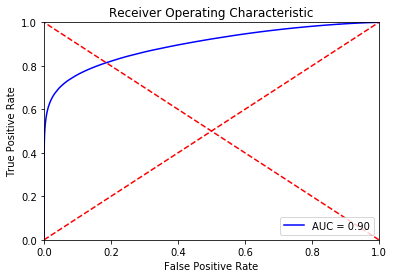

In [10]:
print "AUC: ", roc_auc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([1, 0], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
# Computer the EER:
for index,num1 in enumerate(fpr):
    if num1>(1-tpr[index]):
        print "ERR point is following:"
        print "False positive rate: ",num1
        print "True positive rate:",tpr[index]
        break
        
print "The error rate for random guess is :", len(imposter_match_dists)/float(len(genuine_match_dists)+len(imposter_match_dists))


ERR point is following:
False positive rate:  0.185574948559203
True positive rate: 0.8144251386200307
The error rate for random guess is : 0.498096278308


In [12]:
# (g) Implement a K-NN classiﬁer.
def KNN_classifier(test_set, train_set,train_labels,K):
    ret=[]
    dist_array=cdist(test_set,train_set)
    for row in dist_array:
        nearest_labels=[]
        mode_list=[]
        sorted_index = np.argsort(row)
        for i in range(K):   
            nearest_labels.append(train_labels[sorted_index[i]])
            mode_list.append(max(nearest_labels, key = nearest_labels.count))
        ret.append(mode_list)
    return ret

In [13]:
# (h) Using the training data for all digits, perform 3 fold cross-validation 
# on your K-NN classiﬁer and report your average accuracy. 
def cross_validation_KNN_evaluate(dataSet,labels,K,fold_indices):
    train_indices, test_indices = fold_indices
    X_train = dataSet[train_indices]
    Y_train = labels[train_indices]
    X_test = dataSet[test_indices]
    Y_test = labels[test_indices]
    
    list_X_train=X_train
    list_X_test=X_test
    list_Y_train=Y_train
    list_Y_test=Y_test
    
    Y_estimate=KNN_classifier(list_X_test,list_X_train,list_Y_train,K)
    return (Y_estimate,list_Y_test)

def score(estimate_labels,labels):
    if len(labels)!=len(estimate_labels):
        print "len not equal"
    else:
        ret = []
        for i in range(len(estimate_labels[0])):
            col_est=[row[i] for row in estimate_labels]
            count = 0
            for i,y in enumerate(col_est):
                if y == labels[i]:
                    count+=1
            accurate = count/float(len(estimate_labels))
            ret.append(accurate)
        return ret
    

In [14]:
dist_matrix1=0
dist_matrix2=0
dist_matrix3=0

In [15]:
%%time
fold1=list(cross_validation.KFold(len(X_train), n_folds=3))[0]
fold2=list(cross_validation.KFold(len(X_train), n_folds=3))[1]
fold3=list(cross_validation.KFold(len(X_train), n_folds=3))[2]

pair1=cross_validation_KNN_evaluate(X_train,Y_train,11,fold1)
pair2=cross_validation_KNN_evaluate(X_train,Y_train,11,fold2)
pair3=cross_validation_KNN_evaluate(X_train,Y_train,11,fold3)
score1=score(pair1[0],pair1[1])
score2=score(pair2[0],pair2[1])
score3=score(pair3[0],pair3[1])
print score1
print score2
print score3

[0.9645, 0.9645, 0.9665, 0.9670714285714286, 0.9652142857142857, 0.9666428571428571, 0.9645, 0.9640714285714286, 0.9617142857142857, 0.9617857142857142, 0.9602142857142857]
[0.9631428571428572, 0.9631428571428572, 0.965, 0.9661428571428572, 0.9645714285714285, 0.9653571428571428, 0.9632857142857143, 0.9635, 0.9623571428571429, 0.9621428571428572, 0.9602857142857143]
[0.9655, 0.9655, 0.9677857142857142, 0.9686428571428571, 0.967, 0.9674285714285714, 0.9656428571428571, 0.9655, 0.965, 0.9642142857142857, 0.9621428571428572]
Wall time: 39min 21s


In [16]:
avg_accuracy=(score1[3]+score2[3]+score3[3])/3
print avg_accuracy

0.967285714286


In [17]:
# (i) Generate a confusion matrix (of size 10×10) from your results. Which digits are particularly tricky to classify?
# constructing confusion matrix
digits_matrix=[[0]*10 for i in range(10)]
estimate1_row_K4=[row[3] for row in pair1[0]]
estimate2_row_K4=[row[3] for row in pair2[0]]
estimate3_row_K4=[row[3] for row in pair3[0]]
actual_label1=pair1[1]
actual_label2=pair2[1]
actual_label3=pair3[1]
for index,digit in enumerate(estimate1_row_K4):
    digits_matrix[digit][actual_label1[index]]+=1
for index,digit in enumerate(estimate2_row_K4):
    digits_matrix[digit][actual_label2[index]]+=1
for index,digit in enumerate(estimate3_row_K4):
    digits_matrix[digit][actual_label3[index]]+=1
print digits_matrix

[[4104, 0, 28, 3, 2, 8, 23, 1, 11, 14], [0, 4652, 37, 10, 44, 3, 6, 54, 44, 11], [4, 9, 3999, 27, 0, 2, 0, 10, 15, 3], [0, 2, 15, 4187, 0, 55, 0, 2, 55, 27], [0, 4, 4, 0, 3904, 2, 5, 9, 14, 48], [6, 1, 4, 47, 0, 3640, 16, 0, 64, 12], [12, 4, 3, 3, 15, 49, 4085, 0, 19, 2], [3, 8, 74, 25, 8, 4, 0, 4272, 12, 63], [2, 2, 9, 28, 1, 6, 2, 0, 3787, 12], [1, 2, 4, 21, 98, 26, 0, 53, 42, 3996]]


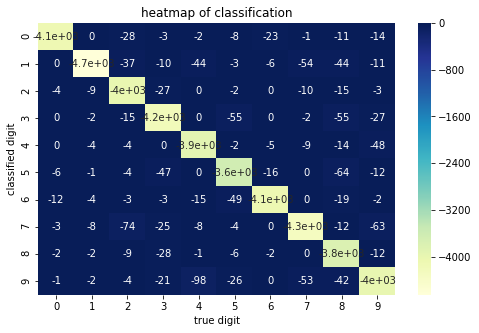

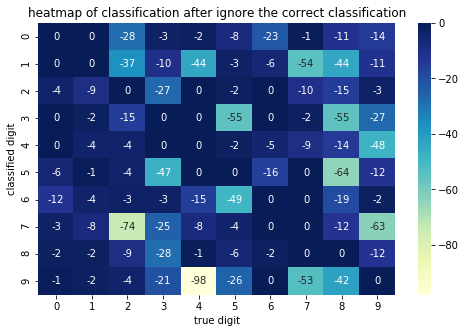

In [31]:
import seaborn as sns
import copy
# plt.imshow(np.negative(digits_matrix), cmap='hot', interpolation='nearest')
plt.subplots(figsize=(8, 5))
sns.heatmap(np.negative(digits_matrix), annot=True, cmap="YlGnBu")
plt.title('heatmap of classification')
plt.xlabel('true digit')
plt.ylabel('classified digit')
plt.show()

confusion_matrix2 = copy.deepcopy(digits_matrix)
for i in range(10):
    confusion_matrix2[i][i]=0
# plt.imshow(np.negative(confusion_matrix2), cmap='hot', interpolation='nearest')
# plt.show()

plt.subplots(figsize=(8, 5))
sns.heatmap(np.negative(confusion_matrix2), annot=True, cmap="YlGnBu")
plt.title('heatmap of classification after ignore the correct classification')
plt.xlabel('true digit')
plt.ylabel('classified digit')
plt.show()

# Conlusion: The number 4 is very likely to be classified to 9. 
#            The number 2 is likely to be classified to 7.
#            The number 8 is a little likely to be classified to 5.
#            The number 9 is a little likely to be classified to 7.

In [28]:
%%time
# (j) Train your classiﬁer with all of the training data, and test your classiﬁer with the test data. 
#     Submit your results to Kaggle.
Y_test_all_K=KNN_classifier(X_test,X_train,Y_train, 11)

Wall time: 58min 27s


In [29]:
Y_test_K4=[row[3] for row in Y_test_all_K]
print Y_test_K4

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4, 2, 3, 1, 0, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 9, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 5, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 2, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 

In [30]:
file_name = "digit_Recognizer_submission_K"+str(4)+".csv"
with open(file_name, mode='wb') as submission_file:
    fieldnames=['ImageId','Label']
    writer = csv.DictWriter(submission_file, fieldnames=fieldnames)
    writer.writerow({'ImageId':'ImageId','Label':'Label'})
    for j in range(len(Y_test_K4)):
        writer.writerow({'ImageId':j+1, 'Label':Y_test_K4[j]})
print "done"

done
